In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import rayleigh as f
from scipy.stats import norm

## Центральная предельная теорема своими руками

Рассмотрим распределение Рэлея — это распределение вероятностей случайной величины $X$ с плотностью:

$f(x,~\sigma )=\frac{x}{\sigma^2}\exp\left(-\frac{x^2}{2\sigma^2}\right),x\geqslant 0,\sigma >0$

где $\sigma$  — параметр масштаба. Соответствующая функция распределения имеет вид:

$P(x) = P(X\leqslant x) = 1 - \exp\left(-\frac{x^2}{2\sigma^2}\right), x\geqslant 0$

Сгенерируем из него выборку объёма $n = 1000$, при $\sigma=2$. 

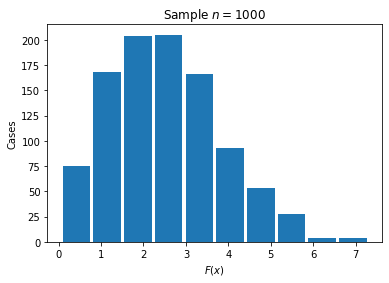

In [2]:
N = 1000
scale = 2
sample = f.rvs(size=N, scale=scale)

plt.hist(sample, rwidth=0.9)
plt.title(f'Sample $n={N}$')
plt.xlabel('$F (x)$')
plt.ylabel('Cases')
plt.show()

Изобразим теоретическую плотность распределения случайной величины на данном диапазоне.

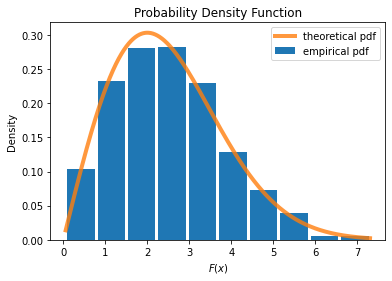

In [3]:
x = np.linspace(min(sample), max(sample), N)

plt.hist(sample, density=True, rwidth=0.9, label='empirical pdf')
plt.plot(x, f.pdf(x, scale=scale), linewidth=4, alpha=0.8, label='theoretical pdf')
plt.title('Probability Density Function')
plt.xlabel('$F(x)$')
plt.ylabel('Density')
plt.legend()
plt.show()

Используя информацию о среднем ($\mathbb{E}X = \sqrt{\frac{\pi}{2}}\sigma$):

In [4]:
Ex = f(scale=scale).mean()
Ex, math.sqrt(math.pi / 2) * scale

(2.5066282746310002, 2.5066282746310002)

и дисперсии ($\frac{\mathbb{D}X}{n}=\frac{1}{n}(2-\pi/2)\sigma^2$) исходного распределения:

In [5]:
Dx = f(scale=scale).std() ** 2
Dx, (2 - math.pi / 2) * scale ** 2

(1.7168146928204135, 1.7168146928204138)

Изобразим плотность соответствующего нормального распределения поверх гистаграмм на 1000 выборок некоторых объёмов $n$ (1, 3, 5, 10, 30, 50, 100).

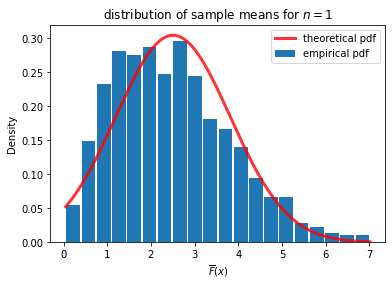

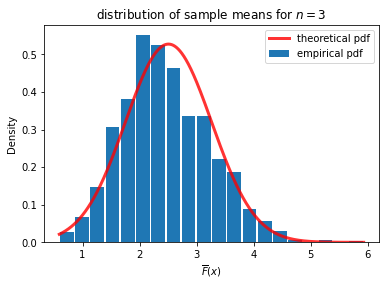

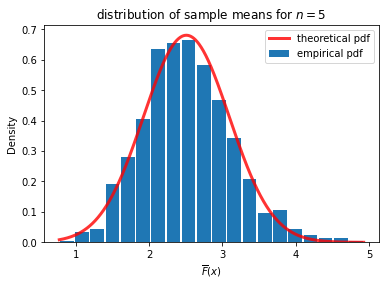

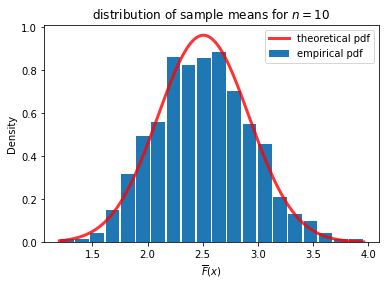

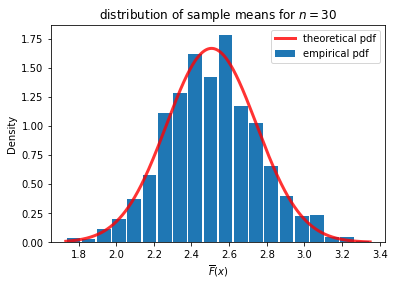

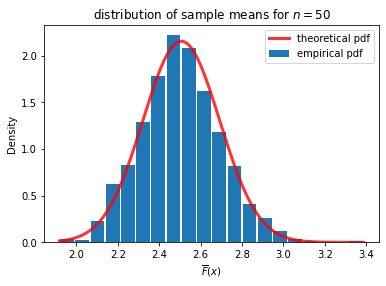

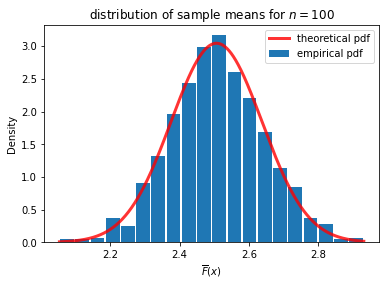

In [6]:
for bins in [1, 3, 5, 10, 30, 50, 100]:
    sample_means = [f.rvs(size=bins, scale=scale).mean() for _ in range(N)]
    x = np.linspace(min(sample_means), max(sample_means), N)
    plt.hist(sample_means, bins=20, density=True, rwidth=0.9, label='empirical pdf')
    plt.plot(x, norm.pdf(x, loc=Ex, scale=math.sqrt(Dx / bins)), linewidth=3, alpha=0.8, color='#ff0000', label='theoretical pdf')
    plt.title(f'distribution of sample means for $n={bins}$')
    plt.xlabel('$\overline{F} (x)$')
    plt.ylabel('Density')
    plt.legend()
    plt.show()

#### Вывод

С ростом объёма выборки n распределение выборочных средних становится все более похоже на нормальное распределение. Соответственно, точность аппроксимации распределения выборочных средних нормальным с ростом n увеличивается.